In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0)
dennis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg', 0)

In [4]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [12]:
def detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [13]:
result = detect_face(dennis)

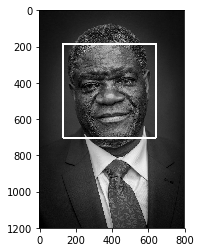

In [15]:
plt.imshow(result, cmap='gray')

In [16]:
result = detect_face(solvay)

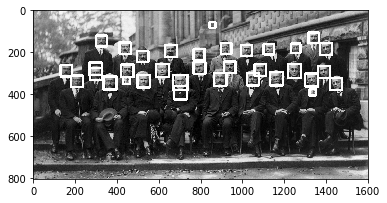

In [17]:
plt.imshow(result, cmap='gray')

In [18]:
def adj_detect_face(img):
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [19]:
result = adj_detect_face(solvay)

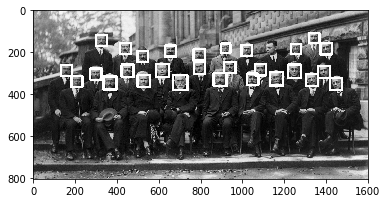

In [20]:
plt.imshow(result, cmap='gray')

In [25]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [29]:
def detect_eyes(img):
    face_img = img.copy()
    
    eye_rects = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
        
    return face_img

In [30]:
result = detect_eyes(nadia)

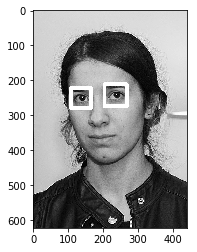

In [31]:
plt.imshow(result, cmap='gray')

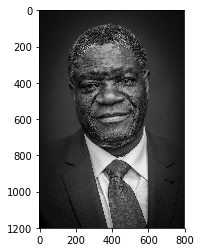

In [33]:
result = detect_eyes(dennis)
plt.imshow(result, cmap='gray')

In [36]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Face Detect', frame)
    
    k = cv2.waitKey(1)

    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()